The data is soured from Kaggle: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_order_items_dataset.csv. The data set comprises of four nine tables below for this analysis project:
- olist_customers
- olist_geolocation
- olist_order_items
- olist_order_payments
- olist_order_reviews
- olist_orders
- olist_products
- olist_sellers
- product_category_name_translation

Our target audience we toward to are: Olist - An e-commerce platform that wants to improve customer satisfaction when they place an order on olist

Through my analysis, I will answer the big questions: "how delivery affects customer satisfaction and what olist should do to improve customer satisfaction through delivery?

=> In this article, I will analyze the effect of delivery performance on review_score. From there, come up with a solution to improve customer satisfaction by delivery factor and evaluate the effectiveness of that solution

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_columns', None)

In [ ]:
np.random.seed(42)

In [ ]:
# Import data
olist_customer = pd.read_csv('/content/drive/MyDrive/Olist/archive/olist_customers_dataset.csv')
olist_geolocation = pd.read_csv('/content/drive/MyDrive/Olist/archive/olist_geolocation_dataset.csv')
olist_orders = pd.read_csv('/content/drive/MyDrive/Olist/archive/olist_orders_dataset.csv')
olist_order_items = pd.read_csv('/content/drive/MyDrive/Olist/archive/olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv('/content/drive/MyDrive/Olist/archive/olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv('/content/drive/MyDrive/Olist/archive/olist_order_reviews_dataset.csv')
olist_products = pd.read_csv('/content/drive/MyDrive/Olist/archive/olist_products_dataset.csv')
olist_sellers = pd.read_csv('/content/drive/MyDrive/Olist/archive/olist_sellers_dataset.csv')
product_category_name = pd.read_csv('/content/drive/MyDrive/Olist/archive/product_category_name_translation.csv')

# OVERVIEW AND CLEANING DATA

### 1.Olist_customer.dataset

In [ ]:
olist_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
olist_customer = olist_customer.rename(columns={"customer_zip_code_prefix": "zip_code_prefix"})

In [ ]:
# Check for duplicated rows
olist_customer.duplicated().sum()

0

In [ ]:
# Check for null values
olist_customer.isna().sum()

customer_id           0
customer_unique_id    0
zip_code_prefix       0
customer_city         0
customer_state        0
dtype: int64

In [ ]:
olist_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   zip_code_prefix     99441 non-null  int64 
 3   customer_city       99441 non-null  object
 4   customer_state      99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


### 2.Olist_geolocation.dataset

In [ ]:
olist_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
# Check for duplicated rows
olist_customer.duplicated().sum()

0

In [ ]:
# Check for null values
olist_geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [ ]:
olist_geolocation = olist_geolocation.rename(columns={"geolocation_zip_code_prefix": "zip_code_prefix"})

In [ ]:
olist_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   zip_code_prefix    1000163 non-null  int64  
 1   geolocation_lat    1000163 non-null  float64
 2   geolocation_lng    1000163 non-null  float64
 3   geolocation_city   1000163 non-null  object 
 4   geolocation_state  1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


### 3.Olist_order.dataset

In [ ]:
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
olist_orders['order_status'].value_counts()/olist_orders.shape[0]*100

delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: order_status, dtype: float64

In [ ]:
olist_orders[olist_orders['order_status'] =='canceled']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14 00:00:00
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaN,2018-02-23 00:00:00
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
...,...,...,...,...,...,...,...,...
98791,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaN,NaN,2017-03-30 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99143,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaN,NaN,2017-10-27 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


Because more than 90% orders are under "delivered" status, and we cannot know clearly other status's meaning in Olist company, therefore, determine to analyze only "delivered" status in the scope of this analysis.

In [ ]:
olist_orders = olist_orders[olist_orders['order_status']=='delivered']

In [ ]:
# Check for duplicated rows
olist_orders.duplicated().sum()

0

In [ ]:
# Check for null values
olist_orders.isna().sum()/olist_orders.shape[0]*100

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.014511
order_delivered_carrier_date     0.002073
order_delivered_customer_date    0.008292
order_estimated_delivery_date    0.000000
dtype: float64

In [ ]:
# Drop null values
olist_orders.dropna(inplace=True)

In [ ]:
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96455 non-null  object
 1   customer_id                    96455 non-null  object
 2   order_status                   96455 non-null  object
 3   order_purchase_timestamp       96455 non-null  object
 4   order_approved_at              96455 non-null  object
 5   order_delivered_carrier_date   96455 non-null  object
 6   order_delivered_customer_date  96455 non-null  object
 7   order_estimated_delivery_date  96455 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


The date column should be in datetime datatype:

In [ ]:
olist_orders['order_purchase_timestamp'] = pd.to_datetime(olist_orders['order_purchase_timestamp'],format='%Y/%m/%d')
olist_orders['order_approved_at'] = pd.to_datetime(olist_orders['order_approved_at'],format='%Y/%m/%d')
olist_orders['order_delivered_carrier_date'] = pd.to_datetime(olist_orders['order_delivered_carrier_date'],format='%Y/%m/%d')
olist_orders['order_delivered_customer_date'] = pd.to_datetime(olist_orders['order_delivered_customer_date'],format='%Y/%m/%d')
olist_orders['order_estimated_delivery_date'] = pd.to_datetime(olist_orders['order_estimated_delivery_date'],format='%Y/%m/%d')

In [ ]:
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


### 4.Olist_order_items.dataset

In [ ]:
olist_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
# Check for duplicated rows
olist_order_items.duplicated().sum()

0

In [ ]:
# Check for null values
olist_order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
olist_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


The date column should be in datetime datatype:

In [ ]:
olist_order_items['shipping_limit_date'] = pd.to_datetime(olist_order_items['shipping_limit_date'],format='%Y/%m/%d')

### 5.Olist_order_payments.dataset

In [ ]:
olist_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
# Check for duplicated rows
olist_order_payments.duplicated().sum()

0

In [ ]:
# Check for null values
olist_order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
olist_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


### 6.Olist_order_reviews.dataset

In [ ]:
olist_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
# Check for duplicated rows
olist_order_reviews.duplicated().sum()

0

In [ ]:
# Check for null values
olist_order_reviews.isna().sum()/olist_order_reviews.shape[0]*100

review_id                   0.000000
order_id                    0.000000
review_score                0.000000
review_comment_title       88.341530
review_comment_message     58.702532
review_creation_date        0.000000
review_answer_timestamp     0.000000
dtype: float64

In [ ]:
# Drop two columns: review_comment_title, review_comment_message which are unnecessasy for analysis
olist_order_reviews.drop(columns=['review_comment_title','review_comment_message'],inplace=True)

In [ ]:
olist_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_creation_date     99224 non-null  object
 4   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


### 7.Olist_products.dataset

In [ ]:
olist_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
# Check for duplicated rows
olist_products.duplicated().sum()

0

In [ ]:
# Check for null values
olist_products.isna().sum()/olist_products.shape[0]*100

product_id                    0.000000
product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64

In [ ]:
# Drop null values
olist_products.dropna(inplace=True)

In [ ]:
olist_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


### 8.Olist_sellers.dataset

In [ ]:
olist_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
# Check for duplicated rows
olist_sellers.duplicated().sum()

0

In [ ]:
olist_sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [ ]:
olist_sellers = olist_sellers.rename(columns={"seller_zip_code_prefix": "zip_code_prefix"})

In [ ]:
olist_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   seller_id        3095 non-null   object
 1   zip_code_prefix  3095 non-null   int64 
 2   seller_city      3095 non-null   object
 3   seller_state     3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


### 9.Product_category_name.dataset

In [ ]:
product_category_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
# Check for duplicated rows
product_category_name.duplicated().sum()

0

In [ ]:
product_category_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
# Function to translate column in dataset
def translate_column_with_df(df_original, df_translation, column_original, column_translation): 
    '''Translate column, given df with translation'''
    
    # convert translation to dictionary to extract key, value pairs
    df_translation = df_translation.set_index(column_original)
    df_translation = df_translation.to_dict('dict')
    
    # map translations
    df_original[column_original] = df_original[column_original].replace(df_translation[column_translation])

In [ ]:
translate_column_with_df(olist_products, product_category_name, 'product_category_name', 'product_category_name_english')

Join data

In [ ]:
order = pd.merge(olist_order_items,olist_orders,on='order_id')
order_product = pd.merge(order,olist_products,on='product_id')
order_product_customer = pd.merge(order_product,olist_customer,on='customer_id')
data_final = pd.merge(order_product_customer,olist_order_reviews,on='order_id')

In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108456 entries, 0 to 108455
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       108456 non-null  object        
 1   order_item_id                  108456 non-null  int64         
 2   product_id                     108456 non-null  object        
 3   seller_id                      108456 non-null  object        
 4   shipping_limit_date            108456 non-null  datetime64[ns]
 5   price                          108456 non-null  float64       
 6   freight_value                  108456 non-null  float64       
 7   customer_id                    108456 non-null  object        
 8   order_status                   108456 non-null  object        
 9   order_purchase_timestamp       108456 non-null  datetime64[ns]
 10  order_approved_at              108456 non-null  datetime64[ns]
 11  

In [ ]:
listing_drop = ['order_item_id',
                'product_id',
                'seller_id',
                'price',
                'freight_value',
                'customer_id',
                'product_name_lenght',
                'product_description_lenght',
                'product_photos_qty',
                'product_weight_g',
                'product_length_cm',
                'product_height_cm',
                'product_width_cm',
                'customer_unique_id',
                'zip_code_prefix',
                'review_id',
                'review_creation_date',
                'review_answer_timestamp']
data_final.drop(columns=listing_drop,inplace=True)

# EDA

Create new columns for analysis

In [ ]:
data_final['delivery_day'] = (data_final['order_delivered_customer_date'] - data_final['order_purchase_timestamp']).dt.days

In [ ]:
data_final['days_est_vs_deliver'] = (data_final['order_estimated_delivery_date'] - data_final['order_delivered_customer_date']).dt.days

In [ ]:
data_final['est_to_deliver']=np.where(data_final['days_est_vs_deliver']<0,'late deliver','on time deliver')

In [ ]:
data_final['purchase_year_month'] = data_final['order_purchase_timestamp'].dt.to_period('M')

In [ ]:
data_final['days_purchase_to_approved'] = (data_final['order_approved_at'] - data_final['order_purchase_timestamp']).dt.days

In [ ]:
data_final['days_seller_to_carrier'] = (data_final['order_delivered_carrier_date'] - data_final['order_approved_at']).dt.days

In [ ]:
data_final['days_carrier_deliver'] = (data_final['order_delivered_customer_date'] - data_final['order_delivered_carrier_date']).dt.days

In [ ]:
data_final.shape[0]

108456

In [ ]:
data_final['review_score'].mean()

4.083231909714539

In [ ]:
data_final['order_purchase_timestamp'].min()

Timestamp('2016-09-15 12:16:38')

In [ ]:
data_final['order_purchase_timestamp'].max()

Timestamp('2018-08-29 15:00:37')

In [ ]:
data_final[data_final['order_purchase_timestamp'].dt.year == 2016].sort_values(by='order_purchase_timestamp')

,order_id,shipping_limit_date,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,customer_city,customer_state,review_score,delivery_day,days_est_vs_deliver,est_to_deliver,purchase_year_month,days_purchase_to_approved,days_seller_to_carrier,days_carrier_deliver
76606,bfbd0f9bdef84302105ad712db648a6c,2016-09-19 23:11:33,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,health_beauty,sao joaquim da barra,SP,1,54,-37,late deliver,2016-09,0,53,1
76608,bfbd0f9bdef84302105ad712db648a6c,2016-09-19 23:11:33,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,health_beauty,sao joaquim da barra,SP,1,54,-37,late deliver,2016-09,0,53,1
76607,bfbd0f9bdef84302105ad712db648a6c,2016-09-19 23:11:33,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,health_beauty,sao joaquim da barra,SP,1,54,-37,late deliver,2016-09,0,53,1
77543,3b697a20d9e427646d92567910af6d57,2016-10-21 16:27:20,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27,watches_gifts,sao paulo,SP,4,23,0,on time deliver,2016-10,3,16,3
102564,be5bc2f0da14d8071e2d45451ad119d9,2016-10-21 16:33:46,delivered,2016-10-03 16:56:50,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07,sports_leisure,panambi,RS,4,24,10,on time deliver,2016-10,2,15,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40636,09dd83f72b2516179cd46b81121fad23,2016-10-16 04:02:06,delivered,2016-10-10 16:55:10,2016-10-12 03:02:04,2016-11-18 12:43:10,2016-11-28 15:38:37,2016-12-12,consoles_games,aracaju,SE,4,48,13,on time deliver,2016-10,1,37,10
73090,48c43415ea1c4af9afa92542183b6e55,2016-10-21 16:29:59,delivered,2016-10-10 17:49:21,2016-10-10 18:02:22,2016-10-30 10:37:42,2016-11-01 14:14:46,2016-12-02,computers_accessories,rio de janeiro,RJ,3,21,30,on time deliver,2016-10,0,19,2
66664,b04bd4e0a1a21fef81b1f24f6fb81c08,2016-10-15 05:03:18,delivered,2016-10-10 18:05:54,2016-10-11 05:03:09,2016-10-15 05:03:18,2016-10-21 10:31:00,2016-11-30,health_beauty,casa branca,SP,5,10,39,on time deliver,2016-10,0,4,6
78265,3d7d60b10ba4b43cf6f6d5df2e933f67,2016-10-21 16:25:18,delivered,2016-10-10 18:09:39,2016-10-10 19:00:39,2016-10-30 14:57:59,2016-10-31 14:57:59,2016-11-30,perfumery,sao jose dos campos,SP,2,20,29,on time deliver,2016-10,0,19,1


It seems that the data for 2016 is missing quite a few days so I will only analyze the data from 2017 to 2018 in this article

In [ ]:
data_final = data_final[(data_final['purchase_year_month']>='2017-01') & (data_final['purchase_year_month']<='2018-07')]

In [ ]:
order_review = data_final[(data_final['purchase_year_month']>='2017-01') & (data_final['purchase_year_month']<='2018-07') ].groupby('purchase_year_month')[['order_id','review_score']].agg({'order_id':'nunique','review_score':'mean'}).reset_index()
order_review

,purchase_year_month,order_id,review_score
0,2017-01,728,4.172414
1,2017-02,1582,4.185930
2,2017-03,2478,4.134086
3,2017-04,2230,4.095429
4,2017-05,3438,4.201938
5,2017-06,3061,4.196221
6,2017-07,3795,4.180632
7,2017-08,4102,4.280813
8,2017-09,4058,4.188372
9,2017-10,4396,4.105212


Number of orders by review_score

In [ ]:
review = data_final.groupby('review_score')['order_id'].nunique().reset_index()
review

,review_score,order_id
0,1,8724
1,2,2732
2,3,7398
3,4,17393
4,5,51858


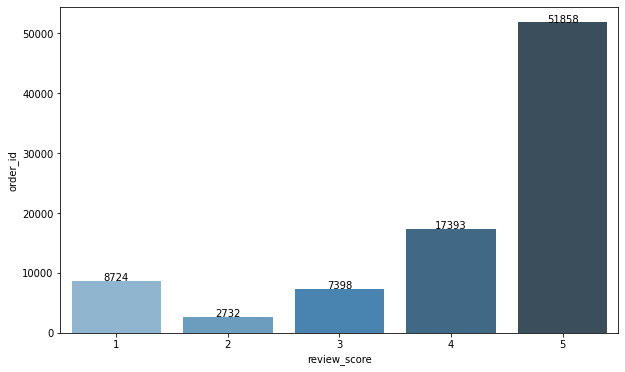

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=review,
            x='review_score',
            y='order_id',
            palette = 'Blues_d')
for i in range(review.shape[0]):
  plt.text(x=i,
           y=review.loc[i,'order_id']+10,
           s=round(review.loc[i,'order_id'],2),
           ha='center',)
plt.show()

Number of orders by delivery performance

In [ ]:
order_delivery = data_final.groupby('est_to_deliver')['order_id'].nunique().reset_index()
order_delivery

,est_to_deliver,order_id
0,late deliver,6893
1,on time deliver,81027


<Figure size 720x720 with 0 Axes>

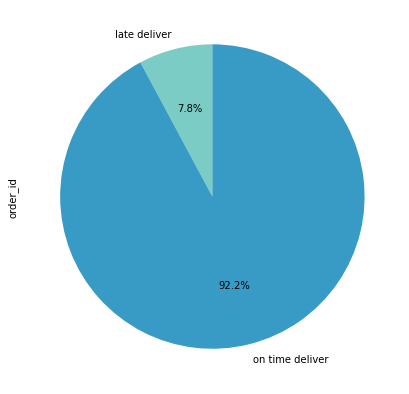

In [ ]:
plt.figure(figsize=(10,10))
# plot chart
colors = plt.get_cmap('GnBu')(np.linspace(0.5, 0.7, len(order_delivery['order_id'])))
order_delivery.plot(kind='pie', colors=colors, y = 'order_id', autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=order_delivery['est_to_deliver'], legend = False,figsize=(7,7))

Delivery days by review_score

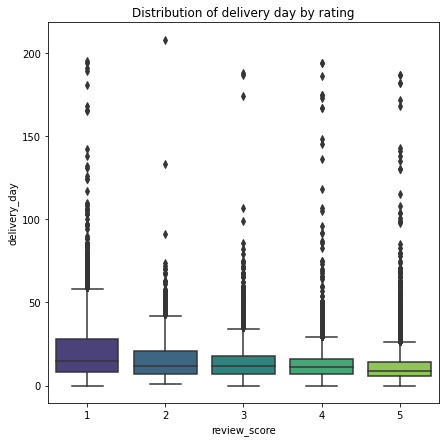

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Distribution of delivery day by rating')
sns.boxplot(data=data_final,
            x='review_score',
            y='delivery_day',palette='viridis')

=> There are many outlier in delivery days and Orders with low ratings have longer delivery times than orders with high ratings

Distribution over time

In [ ]:
order_review['purchase_year_month'] = order_review['purchase_year_month'].astype('string')

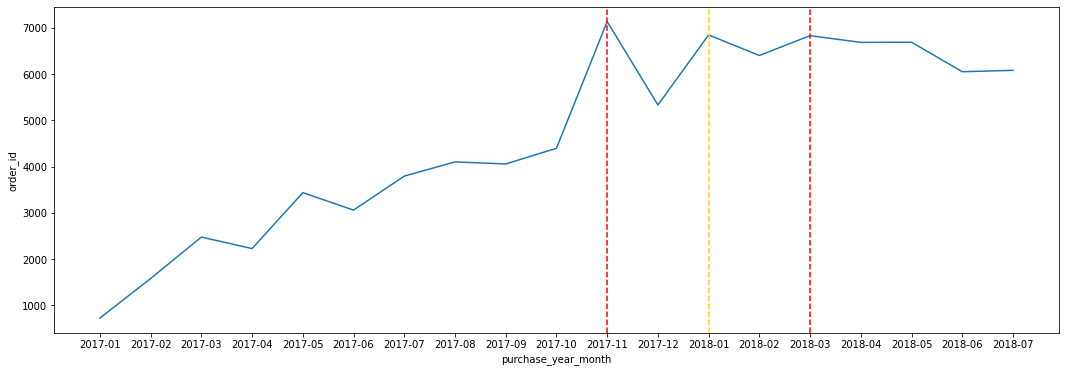

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=order_review,
             x='purchase_year_month',
             y='order_id')
list_1 = ['2017-11','2018-03']
for i in list_1: 
  plt.axvline(x=i,
            color='red', 
            linestyle='--')
plt.axvline(x='2018-01',
            color='gold', 
            linestyle='--')

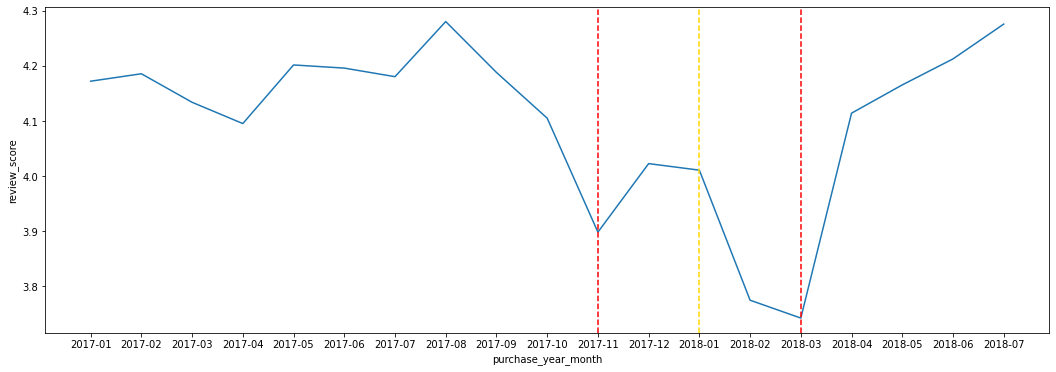

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=order_review,
              x='purchase_year_month',
              y='review_score')
list_1 = ['2017-11','2018-03']
for i in list_1: 
  plt.axvline(x=i,
            color='red', 
            linestyle='--')
plt.axvline(x='2018-01',
            color='gold', 
            linestyle='--')

In [ ]:
data_final['purchase_year_month'] = data_final['purchase_year_month'].astype('string')

In [ ]:
order_late = data_final[data_final['est_to_deliver']=='late deliver'].groupby('purchase_year_month')['order_id'].nunique().reset_index()
order_late

,purchase_year_month,order_id
0,2017-01,22
1,2017-02,44
2,2017-03,135
3,2017-04,172
4,2017-05,119
5,2017-06,116
6,2017-07,129
7,2017-08,135
8,2017-09,206
9,2017-10,227


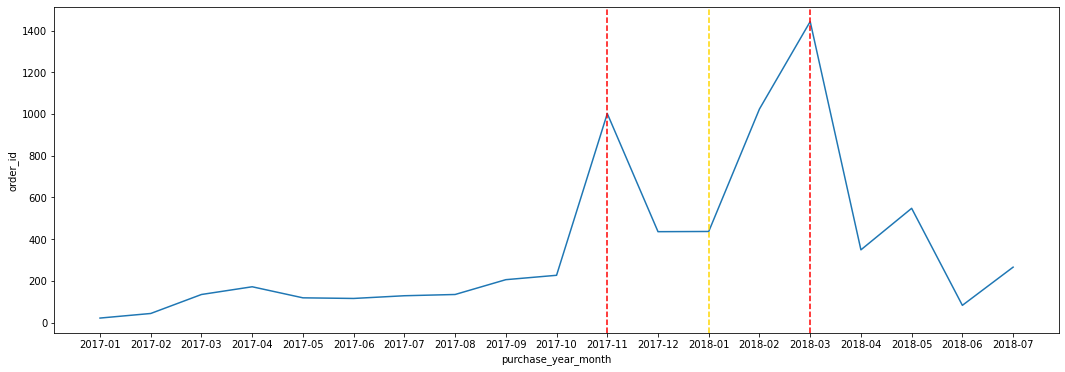

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=order_late,
              x='purchase_year_month',
              y='order_id')
list_1 = ['2017-11','2018-03']
for i in list_1: 
  plt.axvline(x=i,
            color='red', 
            linestyle='--')
plt.axvline(x='2018-01',
            color='gold', 
            linestyle='--')

We can see that, 2017-11 and 2018-13 are the two peak times that have the most orders, equivalent to the lowest review_score and the highest number of late delivery orders.

In 2018-01, the number of orders was also on par with 2018-03, but the review_score did not decrease much. The interesting thing here is that the number of late orders at this time is much lower than the number of late orders in 2018-03 as well as 2017-11.

=> Thus, it can be concluded that the delivery time really affects the review_score. So, next I will analyze the orders for 2018-11 to see how early or late delivery affects review_score.

In [ ]:
In_Nov = data_final[data_final['purchase_year_month']=='2017-11'].drop_duplicates(subset='order_id',keep='last')
In_Nov

,order_id,shipping_limit_date,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,customer_city,customer_state,review_score,delivery_day,days_est_vs_deliver,est_to_deliver,purchase_year_month,days_purchase_to_approved,days_seller_to_carrier,days_carrier_deliver
35,905bd749100612f28936959483361129,2017-12-04 03:33:17,delivered,2017-11-26 12:40:46,2017-11-28 03:38:44,2017-12-01 01:24:40,2017-12-12 22:47:35,2017-12-20,telephony,sao gotardo,MG,5,16,7,on time deliver,2017-11,1,2,11
38,6c5222e0550b757a63908aa2f0cacf95,2017-11-17 16:10:40,delivered,2017-11-11 15:53:40,2017-11-11 16:10:40,2017-11-16 23:29:30,2017-11-27 19:58:30,2017-12-12,health_beauty,estancia velha,RS,5,16,14,on time deliver,2017-11,0,5,10
85,c442abd5622d3602e7e1951edacfd007,2017-11-30 22:31:37,delivered,2017-11-24 19:05:35,2017-11-24 22:33:17,2017-11-28 21:43:01,2017-11-29 18:10:00,2017-12-11,health_beauty,caieiras,SP,3,4,11,on time deliver,2017-11,0,3,0
111,054f63d52e4bcfceaf9cae8637863c82,2017-11-30 23:13:14,delivered,2017-11-26 22:56:45,2017-11-26 23:13:14,2017-11-27 18:13:27,2017-12-07 10:10:38,2017-12-15,bed_bath_table,pitangueiras,SP,5,10,7,on time deliver,2017-11,0,0,9
124,0ccc28cc32fa5c8ca6a3b2d594700714,2017-11-13 04:26:16,delivered,2017-11-04 12:03:25,2017-11-07 07:30:44,2017-11-08 14:41:51,2017-11-16 21:18:34,2017-11-30,furniture_decor,piraquara,PR,1,12,13,on time deliver,2017-11,2,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108419,ff9424310808d51de01b5e582c829336,2017-11-24 19:30:33,delivered,2017-11-19 19:16:26,2017-11-19 19:30:33,2017-11-20 21:12:26,2017-12-07 16:29:03,2017-12-11,bed_bath_table,rio de janeiro,RJ,4,17,3,on time deliver,2017-11,0,1,16
108429,ffb18bf111fa70edf316eb0390427986,2017-12-01 13:39:22,delivered,2017-11-27 13:29:05,2017-11-27 13:39:22,2017-11-28 22:15:05,2017-12-05 18:38:53,2017-12-21,computers_accessories,jatai,GO,5,8,15,on time deliver,2017-11,0,1,6
108434,ffbe8a51afd59fa93224d1c6bc987aee,2017-11-08 16:45:37,delivered,2017-11-02 16:31:52,2017-11-02 16:45:37,2017-11-06 21:21:56,2017-11-09 23:07:42,2017-11-24,stationery,belo horizonte,MG,5,7,14,on time deliver,2017-11,0,4,3
108438,ffd3ff583dec4975e6443d6a396f2f36,2017-11-29 23:12:31,delivered,2017-11-23 23:04:02,2017-11-23 23:12:31,2017-11-27 16:58:04,2017-12-05 18:07:48,2017-12-22,home_appliances,carazinho,RS,5,11,16,on time deliver,2017-11,0,3,8


In [ ]:
#  Average review_score by delivery status
In_Nov_review = In_Nov.groupby('est_to_deliver')['review_score'].mean().reset_index()
In_Nov_review

,est_to_deliver,review_score
0,late deliver,2.401198
1,on time deliver,4.248655


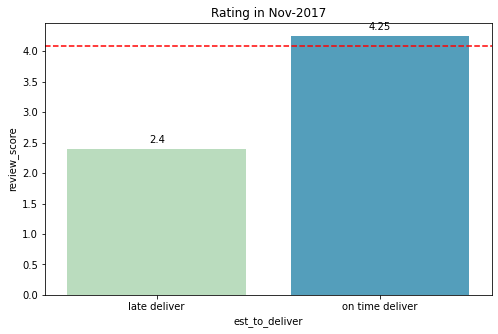

In [ ]:
plt.figure(figsize=(8,5))

sns.barplot(data=In_Nov_review,
             x='est_to_deliver', y='review_score',palette='GnBu')
for i in range(In_Nov_review.shape[0]):
  plt.text(x=i,
          y= In_Nov_review.loc[i,'review_score']+0.1,
          s = round(In_Nov_review.loc[i,'review_score'],2),
          ha='center',
)
plt.axhline(y=4.08, 
            color='red', 
            linestyle='--')
plt.title('Rating in Nov-2017')

plt.show()

## Compare the effects of early orders and late orders on **ratings**

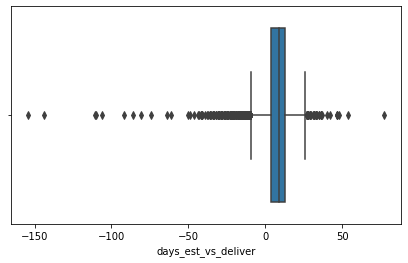

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(data=In_Nov,
             x='days_est_vs_deliver')

In [ ]:
q1 = In_Nov['days_est_vs_deliver'].quantile(0.25) # Tính Q1
q3 = In_Nov['days_est_vs_deliver'].quantile(0.75) # Tính Q3 

# 2. Calculate the interquantile range
iqr = q3 - q1
iqr

# # 3. Calculate the whisker
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

In [ ]:
upper

26.5

In [ ]:
lower

-9.5

In [ ]:
# Remove oulier in days_est_vs_deliver of orders in November 2017
In_Nov_1 = In_Nov[(lower < In_Nov['days_est_vs_deliver']) & (In_Nov['days_est_vs_deliver'] < upper)]

In [ ]:
# Average review_score by number of earlier delivery days
days_early = In_Nov_1[In_Nov_1['est_to_deliver'] =='on time deliver'].groupby('days_est_vs_deliver')['review_score'].mean().reset_index()
days_early

,days_est_vs_deliver,review_score
0,0,3.992593
1,1,4.000000
2,2,4.115854
3,3,4.165680
4,4,4.216667
5,5,4.153374
6,6,4.252273
7,7,4.123967
8,8,4.241535
9,9,4.345528


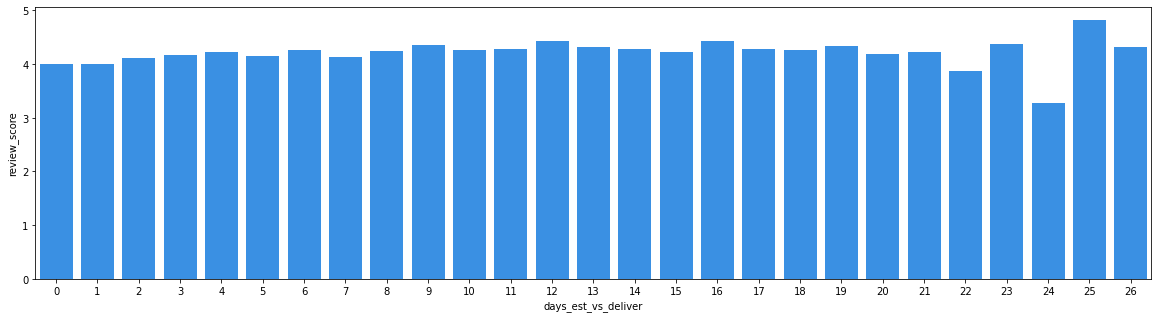

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(data=days_early,
            x='days_est_vs_deliver',
            y='review_score', color = 'dodgerblue')
plt.show()

=> Delivery many days earlier did not increase the review_score much

In [ ]:
# Average review_score by number of later delivery days
days_late = In_Nov_1[In_Nov_1['est_to_deliver'] =='late deliver'].groupby('days_est_vs_deliver')['review_score'].mean().reset_index()
days_late = days_late.sort_values(by='days_est_vs_deliver',ascending=False)
days_late

,days_est_vs_deliver,review_score
8,-1,3.854962
7,-2,3.715596
6,-3,2.887324
5,-4,2.640625
4,-5,2.509434
3,-6,2.375000
2,-7,1.955556
1,-8,2.037037
0,-9,1.954545


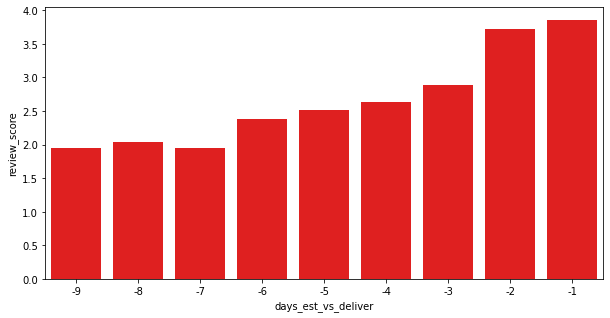

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=days_late,
            x='days_est_vs_deliver',
            y='review_score',
            color='r')
plt.show()

=> The more late delivery the average review_score decreases. 7 days late delivery => review_score decreases from 3.85 to 1.96

## Factors affecting **late delivery**

In [ ]:
In_Nov[In_Nov['est_to_deliver']=='late deliver'].groupby('review_score')[['delivery_day','days_purchase_to_approved','days_seller_to_carrier','days_carrier_deliver']].mean()

,delivery_day,days_purchase_to_approved,days_seller_to_carrier,days_carrier_deliver
review_score,,,,
1,36.821782,0.322772,7.267327,28.536634
2,33.012195,0.378049,4.975610,26.853659
3,30.481818,0.409091,5.054545,24.181818
4,27.983051,0.406780,6.466102,20.398305
5,26.401070,0.508021,4.545455,20.545455


In [ ]:
num = In_Nov[In_Nov['est_to_deliver']=='late deliver'][['delivery_day','est_to_deliver','days_purchase_to_approved','days_seller_to_carrier','days_carrier_deliver']]

In [ ]:
num.corr().style.background_gradient(cmap='Blues')

,delivery_day,days_purchase_to_approved,days_seller_to_carrier,days_carrier_deliver
delivery_day,1.000000,-0.041308,0.264904,0.821298
days_purchase_to_approved,-0.041308,1.000000,-0.041035,-0.084493
days_seller_to_carrier,0.264904,-0.041035,1.000000,-0.327203
days_carrier_deliver,0.821298,-0.084493,-0.327203,1.000000


Average time distribution on On-time deliver order

In [ ]:
q1 = data_final['delivery_day'].quantile(0.25) # Tính Q1
q3 = data_final['delivery_day'].quantile(0.75) # Tính Q3 

# 2. Calculate the interquantile range
iqr = q3 - q1
iqr

# # 3. Calculate the whisker
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

In [ ]:
final = data_final[(lower < data_final['delivery_day']) & (data_final['delivery_day'] < upper)]

In [ ]:
# Average days_approved_vs_purchase
final[final['est_to_deliver'] =='on time deliver']['days_purchase_to_approved'].mean()

0.26868049684593875

In [ ]:
# Average days_seller_to_carrier
final[final['est_to_deliver'] =='on time deliver']['days_seller_to_carrier'].mean()

2.0576727146604235

In [ ]:
# Average days_delivery
final[final['est_to_deliver'] =='on time deliver']['days_carrier_deliver'].mean()

7.3428605493052395

Average time distribution on Late deliver order

In [ ]:
# Average days_approved_vs_purchase
final[final['est_to_deliver'] =='late deliver']['days_purchase_to_approved'].mean()

0.3370338741816112

In [ ]:
# Average days_seller_to_carrier
final[final['est_to_deliver'] =='late deliver']['days_seller_to_carrier'].mean()

4.27070879590094

In [ ]:
# Average days_delivery
final[final['est_to_deliver'] =='late deliver']['days_carrier_deliver'].mean()

16.521776259607172

=> On late delivery orders, the avarage number of days from when the seller delivered to the carrier was 2 days larger than on-time delivery orders. The average carrier delivery time is also much larger than on-time delivery orders (more than 8 days).

=> Delivery time is most affected by the delivery time of the carrier, followed by the time the seller delivers to the carrier.

Distribution of sellers and customers by geolocation

In [ ]:
sellers = pd.merge(olist_sellers, olist_geolocation[['zip_code_prefix','geolocation_lat','geolocation_lng']],\
                   on ='zip_code_prefix')
sellers = sellers.drop_duplicates(subset ="seller_id", keep = 'last') 

In [ ]:
customers = pd.merge(olist_customer, olist_geolocation[['zip_code_prefix','geolocation_lat','geolocation_lng']], \
                     on ='zip_code_prefix')
customers = customers.drop_duplicates(subset ="customer_id", keep = 'last') 

In [ ]:
sellers

,seller_id,zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng
79,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.899471,-47.064267
159,e0eabded302882513ced4ea3eb0c7059,13023,campinas,SP,-22.899471,-47.064267
262,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.374632,-46.941224
649,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,-22.907863,-43.175693
1036,1d2732ef8321502ee8488e8bed1ab8cd,20031,rio de janeiro,RJ,-22.907863,-43.175693
...,...,...,...,...,...,...
434784,f1fdf2d13186575751aa25876536d85c,5314,sao paulo,SP,-23.528454,-46.739722
434852,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR,-23.452487,-51.867759
434920,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP,-23.660173,-46.678758
435016,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,-31.748636,-52.310751


In [ ]:
customers

,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
146,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.500253,-47.400367
293,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,-20.500253,-47.400367
440,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,-20.500253,-47.400367
587,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,-20.500253,-47.400367
734,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,-20.500253,-47.400367
...,...,...,...,...,...,...,...
15083426,0b7a30ba373aeb55cf28add5b5477956,8c8173e547e020f411aa55b2fceed861,87145,paicandu,PR,-23.501620,-52.151097
15083432,ff6b440b2465bfaef05c675efb48cd15,e38a27b979a552e019e297ecc22dc67b,98860,eugenio de castro,RS,-28.528114,-54.147973
15083439,3f7029d9b98a47370cd5f3a97adcbccd,5894d202cc869b4ec460fce3c6ed8cb5,5538,sao paulo,SP,-23.587510,-46.738970
15083452,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.822945,-49.244615


In [ ]:
customer_locations = pd.DataFrame(list(zip(sorted(customers.customer_city.unique()),
                                           customers.groupby('customer_city').count().iloc[:,1],
                                          customers.groupby('customer_city').mean()['geolocation_lat'],
                                  customers.groupby('customer_city').mean()['geolocation_lng'])),
                                  columns=['city','count', 'lat','lng'])



fig = px.scatter_geo(customer_locations, lat="lat", lon="lng",
                     hover_name="city", size="count",
                     color="count",scope = 'south america', size_max = 80)
fig.show()

In [ ]:
sellers_locations = pd.DataFrame(list(zip(sorted(sellers.seller_city.unique()),
                                           sellers.groupby('seller_city').count().iloc[:,1],
                                          sellers.groupby('seller_city').mean()['geolocation_lat'],
                                  sellers.groupby('seller_city').mean()['geolocation_lng'])),
                                  columns=['city','count', 'lat','lng'])



fig = px.scatter_geo(sellers_locations, lat="lat", lon="lng",
                     hover_name="city", size="count",
                     color="count",scope = 'south america', size_max = 80)
fig.show()

The map above shows us that most of Olist’s sellers are in Sao Paulo, and they seem more concentrated in the South East of Brazil, compared to how the customers were spread. This might pose some issues for quicker deliveries, especially if they are further from the customers.

# SOLUTION

**For the seller:**
There should be a department to evaluate the seller's sales performance like shopee's policy ( https://deo.shopeemobile.com/shopee/seller/seller_cms/1c04cd56b6be8712acbf22bcf98302f0/[MY]%20Late%20Shipment%20Rate.pdf ). Then, implement penalty policies for late deliveries

=> when being evaluated, the seller will know about their current activities and what difficulties they are facing to have a sense of change and improvement

=> The evaluation is based on factors such as average pick-up time, cancellation rate, late delivery rate

**For logistics:** 
Olist may consider a combination of building its own logistics system as well as cooperating with Third-Parties Logistic:


1.   Self-Logistic

Example: Jingdong Electronic Shopping Mall - China’s leading one-stop e-commerce platform, providing 580.8 million active customers with direct access to an unrivalled range of authentic, high-quality products, and helping leading local and international brands tap into China’s fast-growing e-commerce market. JD has been very successful in building its own logistics system: 

- In order to improve its competitiveness, Liu Qiangdong,
CEO of Jingdong, decided to build its own logistics in
2007. 
- In 2010, Jingdong logistics launched 211 delivery,
which simply means that orders placed before 11:00 am
will be delivered on the same day. Order by 11:00 p.m. and
sent the next day. Jingdong also launched "Three-Hour Delivery, an option for customers who want to receive their products within three hours of placing an order, setting a new standard for last-mile delivery in the e-commerce industry.
- Now, JD.com is able to achieve rates of approximately 90% of orders delivered the same or next day, a rate of fulfillment that no other e-commerce company of JD.com’s scale can match globally.

Reference: 

https://digital.hbs.edu/platform-rctom/submission/jd-com-chinas-e-commerce-pioneer/

https://corporate.jd.com/ourBusiness#jdLogistics

https://ir.jd.com/news-releases/news-release-details/jdcom-launches-highly-automated-warehouse-shanghai-sets-new

https://www.prnewswire.com/news-releases/jingdong-launches-night-delivery-and-three-hour-delivery-options-209632901.html

https://www.brandsvietnam.com/14579-Dai-gia-JD-com-vua-bom-tien-dau-tu-vao-Tiki-vn-la-ai


Evaluate the effectiveness of the proposal:

Advantage:
- Self-logistics system can help e-commerce
enterprises to carry out advertising, and can effectively
help enterprises to establish a brand image.
- Olist can strictly control
its own logistics
- Olist's self-supporting logistics can better
control the market, reduce the distance between
enterprises and consumers.

Defect:

-Time consuming, complicated process, have to pack and ship all products yourself.
-Requires more resources, can be more costly if not managed properly. Cost of warehouse rental, operations staff, packaging equipment, and software to organize the whole thing


2.   Third-Parties Logistic
- Save time and cost but difficult to control shipping problems and affect customer satisfaction

=>> Evaluate the effectiveness of the combined model: 
- Self-logistics solves the problem of delivery time. Olist may consider implementing self-logistics in central areas and using third-party logistics in rural areas to reduce costs and meet customers' timely delivery needs because: 

- The cost of the self-logistics system is high. If part of
the logistics and distribution services are handed over to a
third-party logistics company, the logistics and
distribution costs will be greatly reduced
- Third party logistics companies
have rich experience in logistics and distribution. They
can use the familiar logistics and distribution network to
improve transportation efficiency and reduce
transportation costs.

How to work with third-party logistics effectively:

- Perform performance evaluation of each 3PL and rank 3 PLs according to the level of performance from high to low, whoever has the lowest will be reduced or stopped cooperating.
- Track order backlog status by day to predict delays, so that Olist can communicate with customers sooner if a delay in delivery is expected, instead of just keeping them waiting.


In [ ]:
# Mount to Google Sheets 
from google.colab import auth
import numpy as np
auth.authenticate_user()

# Import neccessary libraries -- Đi học syntax 
import gspread
from gspread_dataframe import set_with_dataframe
from google.auth import default
creds, _ = default()

# Authorize Google Sheets API
gc = gspread.authorize(creds)

In [ ]:
# Create a new Google Spreadsheets
sh = gc.create('olist_delivery_final') 

In [ ]:
delivery_day_review = data_final[['delivery_day','review_score']]
delivery_day_review.head()

,delivery_day,review_score
0,7,5
1,15,5
2,17,4
3,8,5
4,13,5


In [ ]:
review.head()

,review_score,order_id
0,1,8724
1,2,2732
2,3,7398
3,4,17393
4,5,51858


In [ ]:
order_delivery.head()

,est_to_deliver,order_id
0,late deliver,6893
1,on time deliver,81027


In [ ]:
order_review.head()

,purchase_year_month,order_id,review_score
0,2017-01,728,4.172414
1,2017-02,1582,4.185930
2,2017-03,2478,4.134086
3,2017-04,2230,4.095429
4,2017-05,3438,4.201938


In [ ]:
order_late.head()

,purchase_year_month,order_id
0,2017-01,22
1,2017-02,44
2,2017-03,135
3,2017-04,172
4,2017-05,119


In [ ]:
In_Nov.head()


,order_id,shipping_limit_date,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,customer_city,customer_state,review_score,delivery_day,days_est_vs_deliver,est_to_deliver,purchase_year_month,days_purchase_to_approved,days_seller_to_carrier,days_carrier_deliver
35,905bd749100612f28936959483361129,2017-12-04 03:33:17,delivered,2017-11-26 12:40:46,2017-11-28 03:38:44,2017-12-01 01:24:40,2017-12-12 22:47:35,2017-12-20,telephony,sao gotardo,MG,5,16,7,on time deliver,2017-11,1,2,11
38,6c5222e0550b757a63908aa2f0cacf95,2017-11-17 16:10:40,delivered,2017-11-11 15:53:40,2017-11-11 16:10:40,2017-11-16 23:29:30,2017-11-27 19:58:30,2017-12-12,health_beauty,estancia velha,RS,5,16,14,on time deliver,2017-11,0,5,10
85,c442abd5622d3602e7e1951edacfd007,2017-11-30 22:31:37,delivered,2017-11-24 19:05:35,2017-11-24 22:33:17,2017-11-28 21:43:01,2017-11-29 18:10:00,2017-12-11,health_beauty,caieiras,SP,3,4,11,on time deliver,2017-11,0,3,0
111,054f63d52e4bcfceaf9cae8637863c82,2017-11-30 23:13:14,delivered,2017-11-26 22:56:45,2017-11-26 23:13:14,2017-11-27 18:13:27,2017-12-07 10:10:38,2017-12-15,bed_bath_table,pitangueiras,SP,5,10,7,on time deliver,2017-11,0,0,9
124,0ccc28cc32fa5c8ca6a3b2d594700714,2017-11-13 04:26:16,delivered,2017-11-04 12:03:25,2017-11-07 07:30:44,2017-11-08 14:41:51,2017-11-16 21:18:34,2017-11-30,furniture_decor,piraquara,PR,1,12,13,on time deliver,2017-11,2,1,8


In [ ]:
days_early.head()

,days_est_vs_deliver,review_score
0,0,3.992593
1,1,4.000000
2,2,4.115854
3,3,4.165680
4,4,4.216667


In [ ]:
days_late.head()

,days_est_vs_deliver,review_score
8,-1,3.854962
7,-2,3.715596
6,-3,2.887324
5,-4,2.640625
4,-5,2.509434


In [ ]:
def export_data_to_new_sheet(gsheet_key, worksheet_name, data):
    """gsheet_key (str): ID of Google Sheet File. (Key is the part behind /d/ and before /edit
                   For example: https://docs.google.com/spreadsheets/d/1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA/edit?usp=sharing
                   Key is 1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA
       worksheet_id (int): 0, 1, 2, ... 
       data (DataFrame): data to write
    """
    sh = gc.open_by_key(gsheet_key)
    
    # To create a new worksheet with 1000 rows and 26 columns
    worksheet = sh.add_worksheet(worksheet_name, 1000, 26)

    # For writing to an existing worksheet
    # worksheet = sh.get_worksheet(0) # --> to get the first worksheet

    set_with_dataframe(worksheet, data)

In [ ]:
# Notice! Replace the key by your google sheet key

export_data_to_new_sheet('1QTP-zXEhiDO8hHBSowynljCW4Ovn3h6E_N9L6RvWtl8', 'review', review)
export_data_to_new_sheet('1QTP-zXEhiDO8hHBSowynljCW4Ovn3h6E_N9L6RvWtl8', 'order_delivery', order_delivery)
export_data_to_new_sheet('1QTP-zXEhiDO8hHBSowynljCW4Ovn3h6E_N9L6RvWtl8', 'order_review', order_review)
export_data_to_new_sheet('1QTP-zXEhiDO8hHBSowynljCW4Ovn3h6E_N9L6RvWtl8', 'order_late', order_late)
export_data_to_new_sheet('1QTP-zXEhiDO8hHBSowynljCW4Ovn3h6E_N9L6RvWtl8', 'In_Nov', In_Nov)
export_data_to_new_sheet('1QTP-zXEhiDO8hHBSowynljCW4Ovn3h6E_N9L6RvWtl8', 'days_early', days_early)
export_data_to_new_sheet('1QTP-zXEhiDO8hHBSowynljCW4Ovn3h6E_N9L6RvWtl8', 'days_late', days_late)